## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("./QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.ndim, df.size, df.shape

(2, 5973, (1991, 3))

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
print(df["TAG"].unique())

df[["TAG", "POSTS"]].groupby("TAG").sum()

['c#' 'assembly' 'javascript' 'c' 'python' 'perl' 'c++' 'java' 'delphi'
 'ruby' 'php' 'r' 'swift' 'go']


,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df["DATE"][0], type(df["DATE"][0])

('2008-07-01 00:00:00', str)

In [10]:
df["DATE"]= pd.to_datetime(df["DATE"])

In [11]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [12]:
test_df = pd.DataFrame({"Age":['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'], 
                       "Actor":['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                       "Power": [100, 80, 25, 50, 99, 75, 5, 30]})

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
test_df.shape

(8, 3)

In [14]:
test_df.columns

Index(['Age', 'Actor', 'Power'], dtype='object')

In [15]:
test_df.head()

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99


In [16]:
pivoted_test = test_df.pivot(index='Age', columns='Actor', values='Power')

In [17]:
pivoted_test.shape

(2, 4)

In [18]:
pivoted_test.head()

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [19]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [20]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values = 'POSTS')

In [21]:
reshaped_df.shape

(145, 14)

In [22]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [23]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

- There are some missing values for the programming languages, Which is why the counts are different
- missing data can have multiple reason like, language was there during that time...

In [24]:
reshaped_df.fillna(0, inplace=True)

In [25]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [26]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

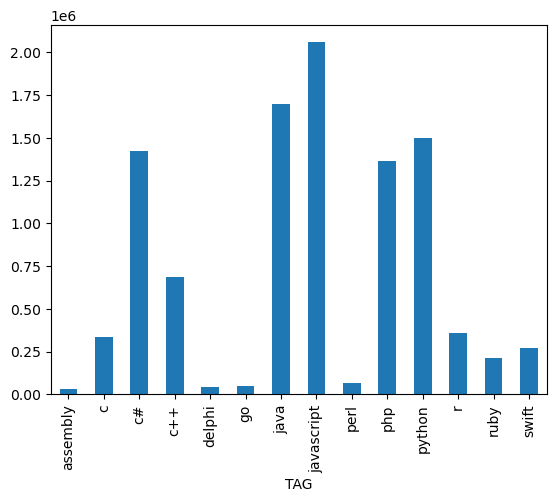

In [27]:
reshaped_df.sum().plot(kind='bar')
plt.show()

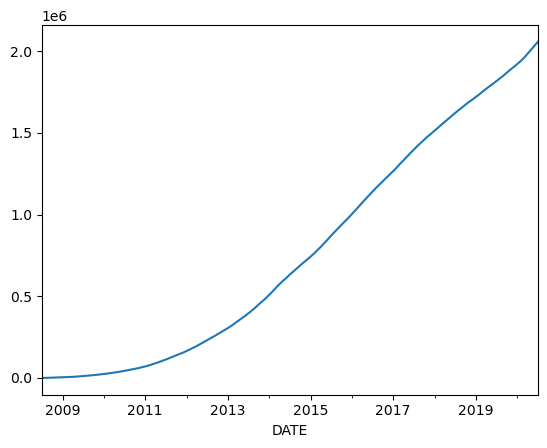

In [28]:
data = reshaped_df["javascript"].cumsum()
data.plot()
plt.show()

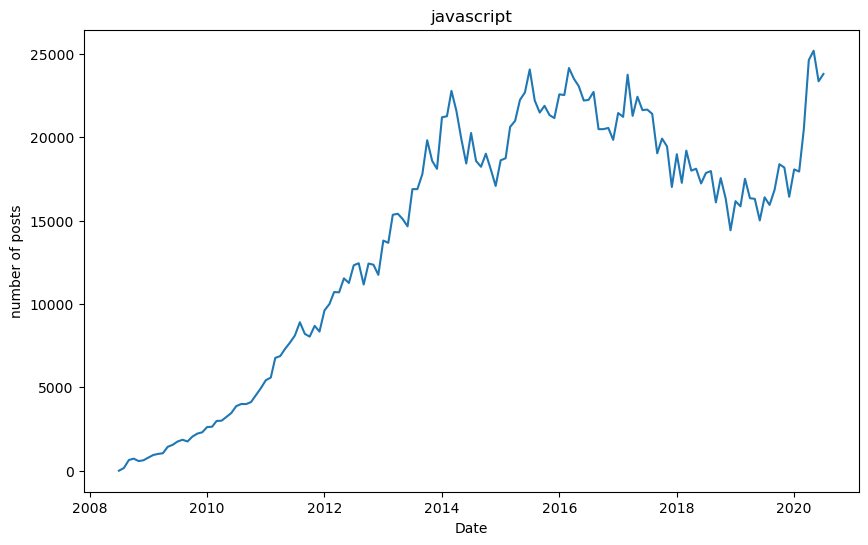

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(reshaped_df.index, reshaped_df["javascript"])

ax.set(title="javascript", 
      xlabel="Date",
      ylabel="number of posts")

plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

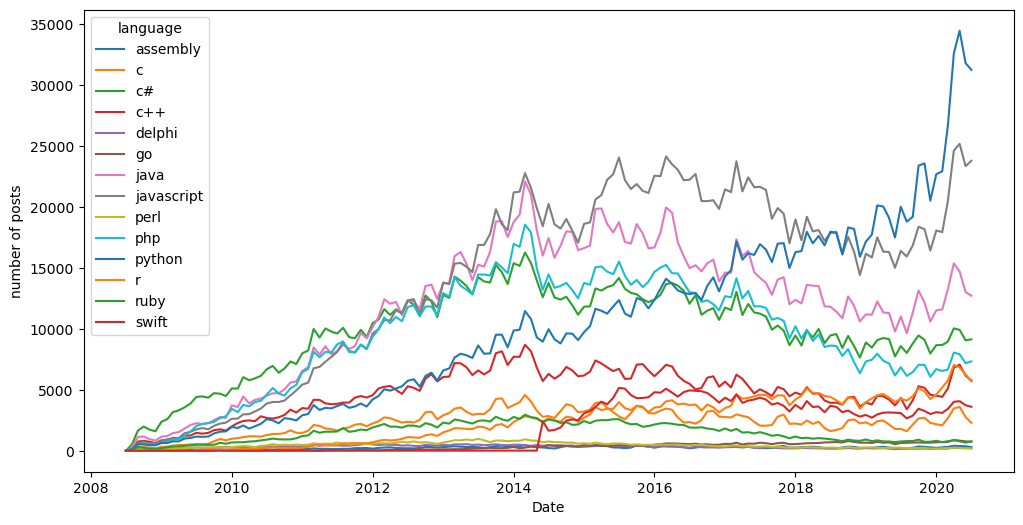

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

for column in reshaped_df.columns:
    line = ax.plot(reshaped_df.index, reshaped_df[column], label = column)

ax.legend(title="language")
    
ax.set(xlabel="Date",
      ylabel="number of posts")

plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [43]:
roll_df = reshaped_df.rolling(window=6).mean()

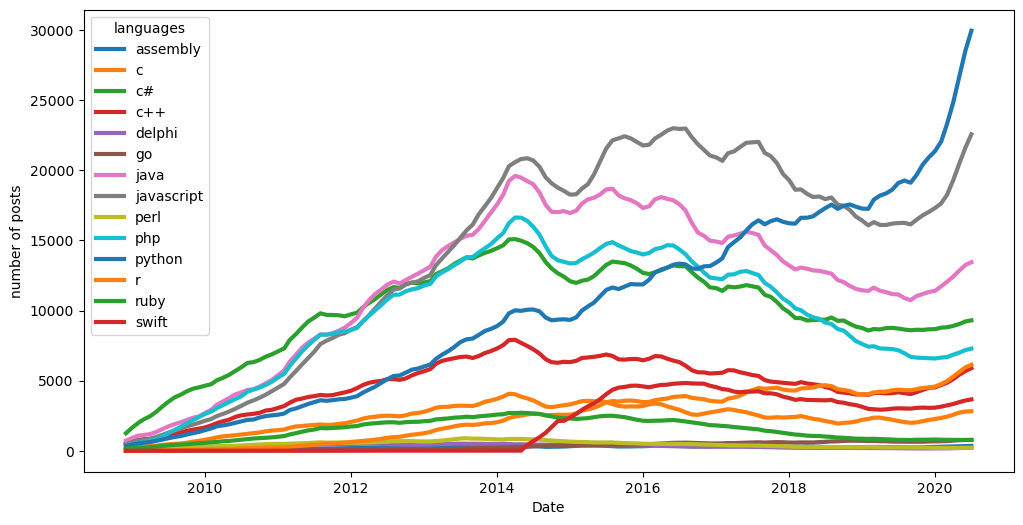

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))

for column in roll_df.columns:
    line = ax.plot(roll_df.index, roll_df[column], label = column, linewidth=3)

ax.legend(title="languages")
    
ax.set(xlabel="Date",
      ylabel="number of posts")

plt.show()

- The most popular programming language from 2008 to 2012 was C# with an rolling avg of 9000+
- The most popular programming language from 2015 to 2018 was javascript
- The spot for the most popular programming language in 2020 was accounted to PYTHON

* used `.groupby()` to explore the number of posts and entries per programming language

* converted strings to Datetime objects with `to_datetime()` for easier plotting

* reshaped our DataFrame by converting categories to columns using `.pivot()`

* used `.count()` and `isna().values.any()` to look for NaN values in our DataFrame, which we then replaced using .fillna()

* created (multiple) line charts using `.plot()` with a `for-loop`

* styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

* added a legend to tell apart which line is which by colour

* smoothed out our time-series observations with `.rolling().mean()` and plotted them to better identify trends over time.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_09-46-41-09be133d8fa576738faffbacf0971882.jpg" height=200px width=200px>